In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.io as sio 

from math import e
def MorletWavelet(fc):

    F_RATIO = 7
    Zalpha2 = 3.3

    sigma_f = fc/F_RATIO
    sigma_t = 1/(2*math.pi*sigma_f)
    A = 1/((sigma_t*(math.pi**0.5))**0.5)
    #print(A)
    max_t = math.ceil(Zalpha2 * sigma_t)

    t = []
    for t_index in range(-max_t,max_t+1):
        t.append(t_index)
    MW = []
    for t_multi in range(len(t)):
        v1 = 1/(-2*sigma_t**2)
        v2 = (2j)*math.pi*fc
        want = t[t_multi]*(t[t_multi]*v1+v2)
        MW.append(A * e**(want))
    return MW


def tfa_morlet(td, fs, fmin, fmax, fstep):
    TFmap = []
        
    for fc in range(fmin,fmax+1):#,fs
        MW = MorletWavelet(fc/fs)  
        #np.convolve(td, MW, 'same')
               
        npad = len(MW) - 1
        u_padded = np.pad(td, (npad//2, npad - npad//2), mode='constant')
        cr = np.convolve(u_padded, MW, 'valid')
        
        TFmap.append(abs(cr))
    return TFmap

In [2]:
data=sio.loadmat('./data.mat')

In [9]:
data['data'][0]

array([0., 0., 0., ..., 0., 0., 0.])

In [10]:
samplerate=500
N=1024

sinefreq1=20
sinefreq2=60

f1 = 1 
f2 = 250 
fstep=1

ts=[]
taxis = []
for i in range(1,int(N/4)+1):
    ts.append(i/samplerate)
for i in range(1,int(N)+1):
    taxis.append(i/samplerate)
    
spec = tfa_morlet(data['data'][0], samplerate, f1, f2, fstep)
Mag=abs(np.array(spec))

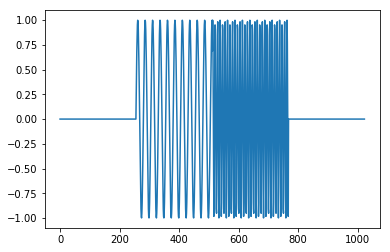

In [13]:
plt.plot(data['data'][0])

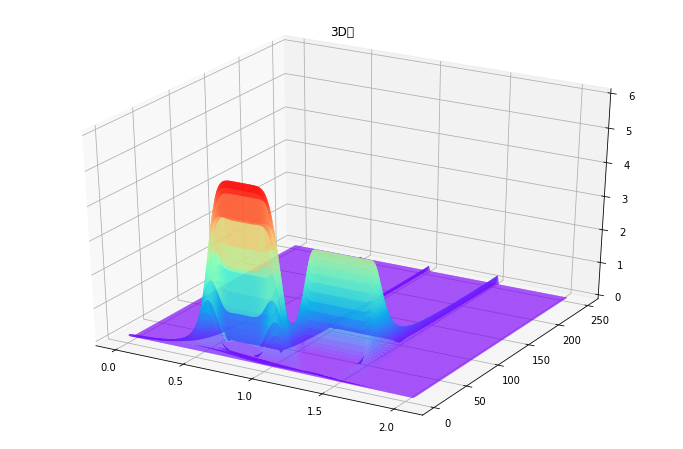

In [14]:
delta = 0.125
x = np.arange(-3.0, 3.0, delta)

fig = plt.figure(figsize=(12, 8))
#ax = Axes3D(fig)

#fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
faxis = []
for i in range(f1,f2+1):
    faxis.append([i])
#taxis, faxis = np.meshgrid(taxis, faxis)
#Axes3D.plot_surface(ax, np.array(taxis), np.array(faxis), np.array(Mag))
Axes3D.plot_surface(ax,np.array(taxis),np.array(faxis),np.array(Mag),rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))
ax.set_zlim(0, 6)
# 设置标题
plt.title("3D圖")
plt.show()